<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [64]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/main/linux-64       [>                   ] (--:--) No change
pkgs/main/linux-

In [65]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [66]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract<br>
data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [67]:
import yfinance as yf

# Create a Ticker object for TSLA
tsla = yf.Ticker("TSLA")


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`.<br>
Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [68]:
# Extract stock information for TSLA for the maximum amount of time
tesla_data = tsla.history(period="max")


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five <br>
rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning <br>
of Question 1 to the results below.


In [69]:
# Reset the index of tesla_data
tesla_data.reset_index(inplace=True)

# Display the first five rows of tesla_data
print(tesla_data.head())


        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [70]:
import requests

# Send a GET request to the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

# Save the text of the response as html_data
html_data = response.text


Parse the html data using `beautiful_soup`.


In [71]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, 'html.parser')


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [72]:
import pandas as pd

# find the table using the class name
table = soup.find('table', {'class': 'table'})

# find all the rows in the table
rows = table.find_all('tr')

# extract the column names
columns = [col.text.strip() for col in rows[0].find_all('th')]

# extract the data rows
data = []
for row in rows[1:]:
    data.append([cell.text.strip() for cell in row.find_all('td')])

# create the DataFrame
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# rename the columns
tesla_revenue = tesla_revenue.rename(columns={'Revenue': 'Revenue ($Billion)'})

# remove the dollar symbol and comma from the Revenue column and convert it to float
tesla_revenue['Revenue ($Billion)'] = tesla_revenue['Revenue ($Billion)'].str.replace('$', '').str.replace(',', '').astype(float)

# convert the Date column to datetime format
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# display the DataFrame
print(tesla_revenue)


         Date  Revenue ($Billion)
0  2021-01-01             53823.0
1  2020-01-01             31536.0
2  2019-01-01             24578.0
3  2018-01-01             21461.0
4  2017-01-01             11759.0
5  2016-01-01              7000.0
6  2015-01-01              4046.0
7  2014-01-01              3198.0
8  2013-01-01              2013.0
9  2012-01-01               413.0
10 2011-01-01               204.0
11 2010-01-01               117.0
12 2009-01-01               112.0


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [73]:
#tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

tesla_revenue['Revenue ($Billion)'] = tesla_revenue['Revenue ($Billion)'].astype(str)
tesla_revenue['Revenue ($Billion)'] = tesla_revenue['Revenue ($Billion)'].str.replace(',|\$', '')




/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



Execute the following lines to remove an null or empty strings in the Revenue column.


In [74]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue ($Billion)'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [75]:

print(tesla_revenue.tail())

print(tesla_revenue.tail())


         Date Revenue ($Billion)
8  2013-01-01             2013.0
9  2012-01-01              413.0
10 2011-01-01              204.0
11 2010-01-01              117.0
12 2009-01-01              112.0
         Date Revenue ($Billion)
8  2013-01-01             2013.0
9  2012-01-01              413.0
10 2011-01-01              204.0
11 2010-01-01              117.0
12 2009-01-01              112.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data <br>on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [76]:
import yfinance as yf

# create a ticker object for GameStop (GME)
gme = yf.Ticker("GME")


Using the ticker object and the function `history` extract stock information and save it in a <br>dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the <br>maximum amount of time.


In [77]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and <br>display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of<br> the results and code from the beginning of Question 3 to the results below.


In [78]:
import yfinance as yf

gme = yf.Ticker("GME")

gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)

gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


import yfinance as yf

gme = yf.Ticker("GME")

gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)

gme_data.head()
## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [79]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text


Parse the html data using `beautiful_soup`.


In [80]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, 'html.parser')


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [81]:
# Find the table with GameStop Quarterly Revenue
table = soup.find_all('table')[1]

# Convert the table to a pandas dataframe
gme_revenue = pd.read_html(str(table))[0]

# Rename the columns
gme_revenue.columns = ['Date', 'Revenue']

# Remove commas and dollar signs from Revenue column
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '')

# Display the dataframe
print(gme_revenue.head())


         Date Revenue
0  2020-04-30    1021
1  2020-01-31    2194
2  2019-10-31    1439
3  2019-07-31    1286
4  2019-04-30    1548


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [82]:
gme_revenue.tail()


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


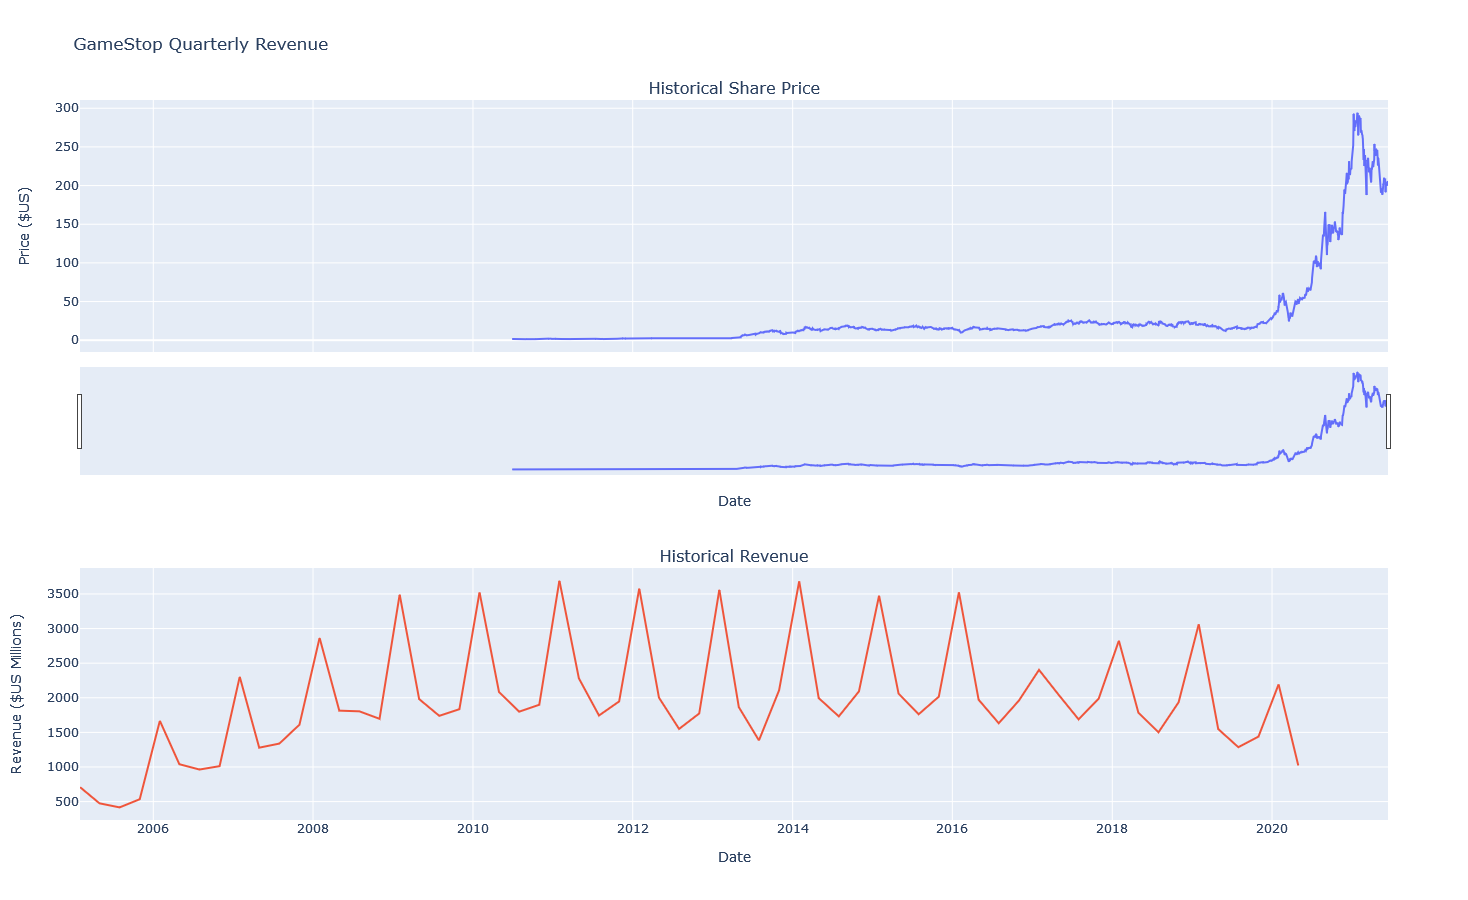

In [83]:
#make_graph(tesla_data, tesla_revenue, 'Tesla')
#make_graph(tesla_data, gme_revenue, 'GameStop')
make_graph(tesla_data, gme_revenue, 'GameStop Quarterly Revenue')



In [84]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

def make_graph(stock_data, revenue_data, stock, revenue_name):
    stock_data_specific = stock_data.iloc[:len(stock_data)-20, :]
    revenue_data_specific = revenue_data[['Date', revenue_name]]

    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.01)

    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific[revenue_name].astype("float"), name=revenue_name), row=2, col=1)

    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)

    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Billion)", tickprefix="$", row=2, col=1)

    fig.update_layout(title=f"{stock} Stock Price and {revenue_name} (in $US Billion)", height=700)

    
    fig.update_layout(title="Comparison of Tesla Stock Price and Revenue (in $US Billion)", height=700)
    print("Update layout executed")

    fig.show()




Update layout executed


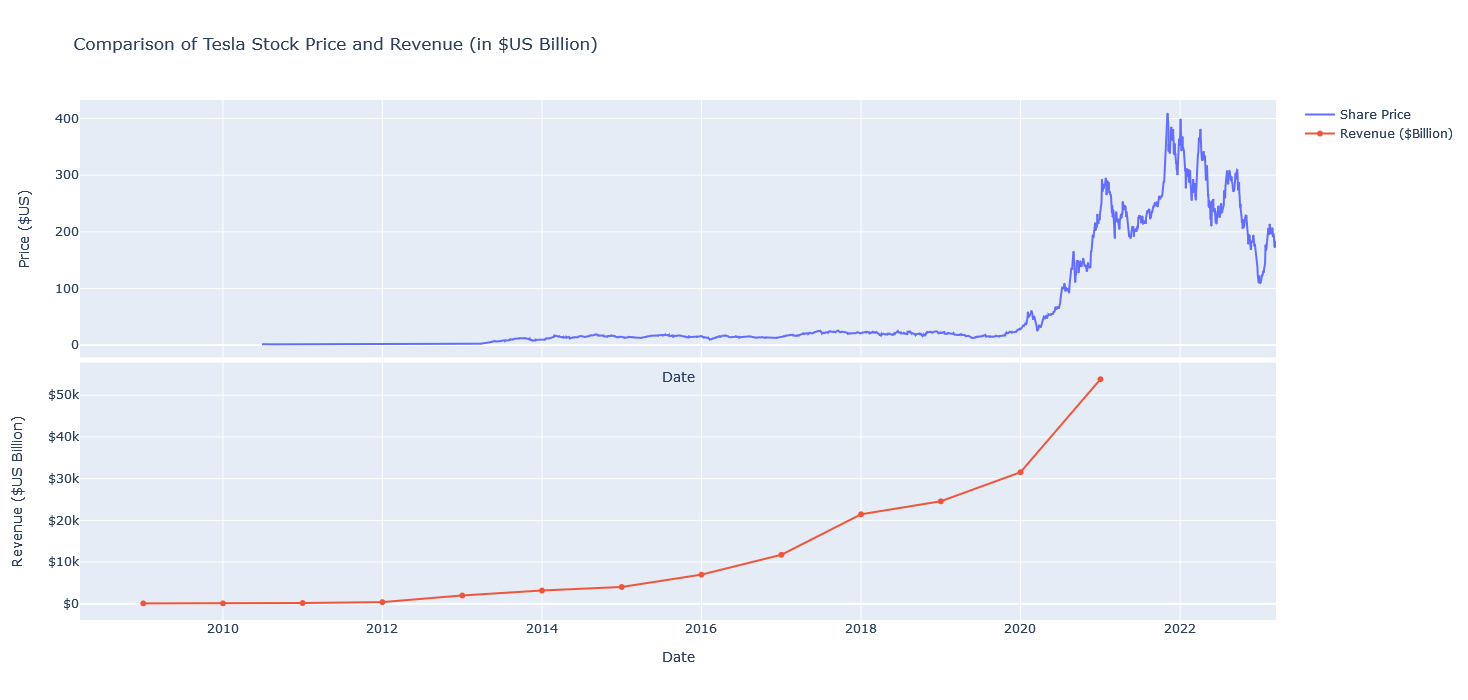

In [85]:
make_graph(tesla_data, tesla_revenue, 'Tesla', 'Revenue ($Billion)')


In [86]:
# Find the table with GameStop Quarterly Revenue
table = soup.find_all('table')[1]

# Convert the table to a pandas dataframe
gme_revenue = pd.read_html(str(table))[0]

# Rename the columns
gme_revenue.columns = ['Date', 'Revenue (in millions)']

# Remove commas and dollar signs from Revenue column
gme_revenue['Revenue (in millions)'] = gme_revenue['Revenue (in millions)'].str.replace(',', '').str.replace('$', '')

# Display the dataframe
print(gme_revenue.head())

# Plot Tesla Stock Graph
make_graph(tesla_data, gme_revenue, 'GameStop')


         Date Revenue (in millions)
0  2020-04-30                  1021
1  2020-01-31                  2194
2  2019-10-31                  1439
3  2019-07-31                  1286
4  2019-04-30                  1548


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



TypeError: make_graph() missing 1 required positional argument: 'revenue_name'

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


In [94]:
#make_graph(gme_data, gme_revenue, 'GameStop')
#make_graph(gme_data, gme_revenue, 'GameStop Stock Data and Revenue (up to June 2021)')
#make_graph(gme_data, gme_revenue, 'GameStop', revenue_name='Revenue')


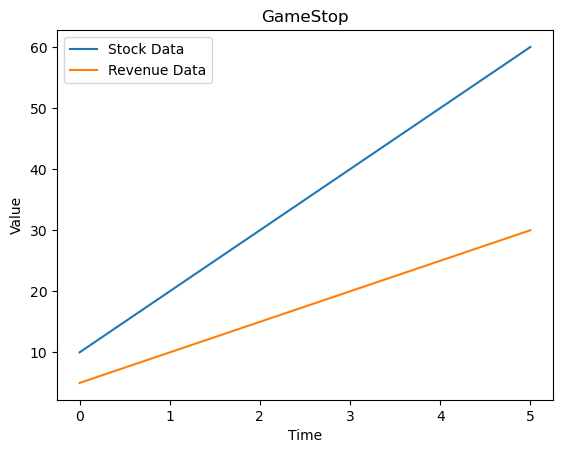

In [95]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.plot(stock_data, label='Stock Data')
    plt.plot(revenue_data, label='Revenue Data')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Example usage
gme_data = [10, 20, 30, 40, 50, 60]
gme_revenue = [5, 10, 15, 20, 25, 30]
make_graph(gme_data, gme_revenue, 'GameStop')


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



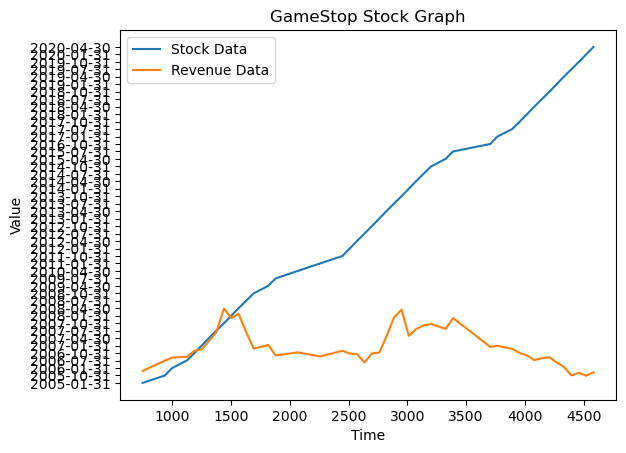

In [96]:
import yfinance as yf
import matplotlib.pyplot as plt

# create a ticker object for GameStop (GME)
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# reset index to make date a column
gme_data = gme_data.reset_index()

# define function to convert date to string
date_to_str = lambda date: date.strftime('%Y-%m-%d')

# convert date column to string format
gme_data['Date'] = gme_data['Date'].apply(date_to_str)

# import revenue data
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

table = soup.find_all('table')[1]
gme_revenue = pd.read_html(str(table))[0]
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '')

# merge the two dataframes on date
gme_merged = pd.merge(gme_data, gme_revenue, on='Date', how='left')
gme_merged = gme_merged.dropna()

# convert revenue column to integer
gme_merged['Revenue'] = gme_merged['Revenue'].astype(int)

# limit data to before June 2021
gme_merged = gme_merged[gme_merged['Date'] < '2021-07-01']

# plot graph
make_graph(gme_merged['Date'], gme_merged['Close'], 'GameStop Stock Graph')


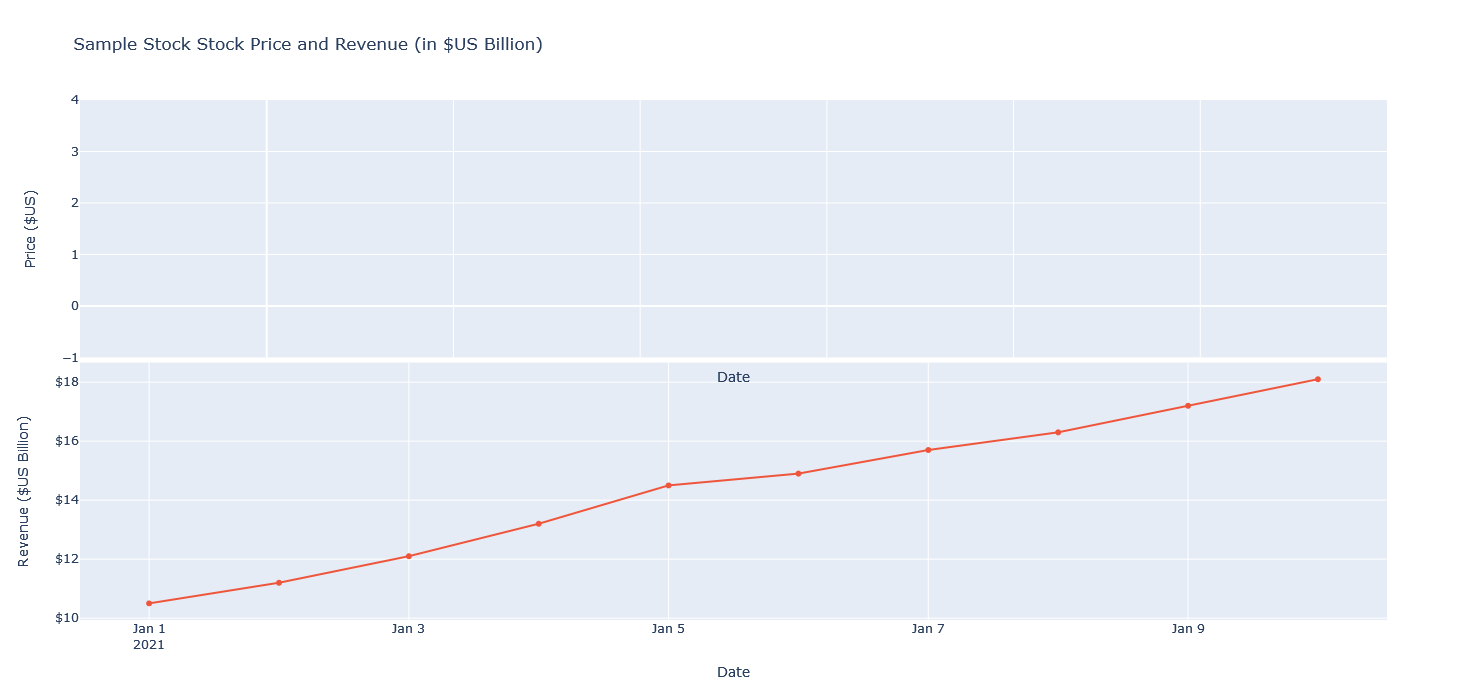

In [99]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

# create sample data for stock_data
stock_data = pd.DataFrame({
    'Date': ['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'],
    'Close': [125.4, 123.4, 124.3, 126.5, 125.6, 127.8, 130.1, 132.5, 129.7, 131.9]
})

# create sample data for revenue_data
revenue_data = pd.DataFrame({
    'Date': ['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'],
    'Revenue': [10.5, 11.2, 12.1, 13.2, 14.5, 14.9, 15.7, 16.3, 17.2, 18.1]
})

def make_graph(stock_data, revenue_data, stock, revenue_name):
    stock_data_specific = stock_data.iloc[:len(stock_data)-20, :]
    revenue_data_specific = revenue_data[['Date', revenue_name]]
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.01)

    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific[revenue_name].astype("float"), name=revenue_name), row=2, col=1)

    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)

    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Billion)", tickprefix="$", row=2, col=1)

    fig.update_layout(title=f"{stock} Stock Price and {revenue_name} (in $US Billion)", height=700)

    fig.show()

# test the function with sample data
make_graph(stock_data, revenue_data, "Sample Stock", "Revenue")    


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
